In [12]:
from ml_dcs.config import config # NOQA
from ml_dcs.domain.evaluation import EvaluationResult

SIMPLE_INPUT_PATH = lambda algorithm: f"tmp/prod-results/results-20241220/20241220_memory-usage_ArtGallery/simple/20241219-075911/testing-result_{algorithm}.json"
GNN_INPUT_PATH_L1 = "tmp/prod-results/results-20241220/20241220_memory-usage_ArtGallery/gnn-L1/20241219-080937/testing-result.json"
GNN_INPUT_PATH_L2 = "tmp/prod-results/results-20241220/20241220_memory-usage_ArtGallery/gnn-L2/20241219-113355/testing-result.json"
GNN_INPUT_PATH_L3 = "tmp/prod-results/results-20241220/20241220_memory-usage_ArtGallery/gnn-L3/20241219-121749/testing-result.json"
X_LABEL = "Actual values (MB)"
Y_LABEL = "Predicted values (MB)"
ORDER_OF_MAG = 3
LIM = (-1 * 10**ORDER_OF_MAG, 8 * 10**ORDER_OF_MAG)

results_mae = []
results_rmse = []

{
  "algorithm": "Random Forest",
  "results": [
    {
      "algorithm": "Random Forest",
      "random_state": 42,
      "duration": "PT0.008344S",
      "mae": 1156777.8711839223,
      "mse": 2254370565114.1226,
      "rmse": 1501456.1482488,
      "r_squared": 0.17577074126629033
    }
  ],
  "result_at_best_accuracy": {
    "algorithm": "Random Forest",
    "random_state": 42,
    "lts_names": [
      "ArtGallery（N, 2 room）_000106",
      "ArtGallery（N, 2 room）_000010",
      "ArtGallery（N, 2 room）_000131",
      "ArtGallery（N, 2 room）_000148",
      "ArtGallery（N, 3 room）_000068",
      "ArtGallery（N, 4 room）_000064",
      "ArtGallery（N, 2 room）_000064",
      "ArtGallery（N, 3 room）_000018",
      "ArtGallery（N, 3 room）_000131",
      "ArtGallery（N, 4 room）_000050",
      "ArtGallery（N, 4 room）_000069",
      "ArtGallery（N, 2 room）_000111",
      "ArtGallery（N, 3 room）_000040",
      "ArtGallery（N, 2 room）_000055",
      "ArtGallery（N, 3 room）_000158",
      "ArtGallery（N, 3 ro

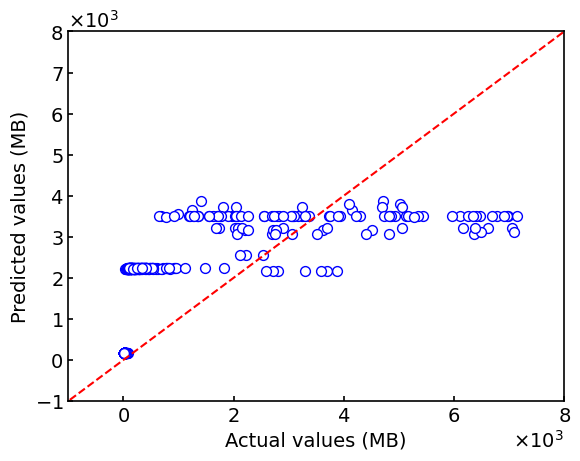

,lts,actual_values,predicted_values
241,"ArtGallery（N, 2 room）_000037",12.384,172.986228
319,"ArtGallery（N, 2 room）_000151",12.448,172.106873
13,"ArtGallery（N, 2 room）_000055",12.655,173.012538
54,"ArtGallery（N, 2 room）_000065",12.839,171.434391
309,"ArtGallery（N, 2 room）_000080",13.689,173.602264
...,...,...,...
236,"ArtGallery（N, 4 room）_000052",6958.988,3510.186076
50,"ArtGallery（N, 4 room）_000156",6975.410,3510.186076
64,"ArtGallery（N, 4 room）_000151",7059.688,3205.779866
120,"ArtGallery（N, 4 room）_000133",7095.450,3112.124275


In [13]:
import json
from ml_dcs.internal.graph.graph import GraphUtil
from ml_dcs.domain.ml_simple import MLSimpleTestingResultSet
from ml_dcs.domain.graph import Graph, PredictionAccuracyGraphData

with open(SIMPLE_INPUT_PATH("RF"), "r") as f:
    data_dict = json.load(f)
data_model = MLSimpleTestingResultSet(**data_dict)
print(data_model.model_dump_json(indent=2, by_alias=True))
data = PredictionAccuracyGraphData.from_ml_simple_class_div1000(data_model)
graph = Graph(
    data=data,
    x_label=X_LABEL,
    y_label=Y_LABEL,
    x_lim=LIM,
    y_lim=LIM,
    order_of_mag=ORDER_OF_MAG
)
util = GraphUtil(graph)
util.show()

results_mae.append(data_model.result_at_best_accuracy.mae)
results_rmse.append(data_model.result_at_best_accuracy.rmse)

EvaluationResult.from_simple_class(data_model).dataframe_div1000

{
  "algorithm": "Gradient Boosting Decision Tree",
  "results": [
    {
      "algorithm": "Gradient Boosting Decision Tree",
      "random_state": 42,
      "duration": "PT0.000805S",
      "mae": 1359161.8535276114,
      "mse": 3491417314367.5645,
      "rmse": 1868533.466215568,
      "r_squared": -0.2765107695617639
    }
  ],
  "result_at_best_accuracy": {
    "algorithm": "Gradient Boosting Decision Tree",
    "random_state": 42,
    "lts_names": [
      "ArtGallery（N, 2 room）_000106",
      "ArtGallery（N, 2 room）_000010",
      "ArtGallery（N, 2 room）_000131",
      "ArtGallery（N, 2 room）_000148",
      "ArtGallery（N, 3 room）_000068",
      "ArtGallery（N, 4 room）_000064",
      "ArtGallery（N, 2 room）_000064",
      "ArtGallery（N, 3 room）_000018",
      "ArtGallery（N, 3 room）_000131",
      "ArtGallery（N, 4 room）_000050",
      "ArtGallery（N, 4 room）_000069",
      "ArtGallery（N, 2 room）_000111",
      "ArtGallery（N, 3 room）_000040",
      "ArtGallery（N, 2 room）_000055",
      "

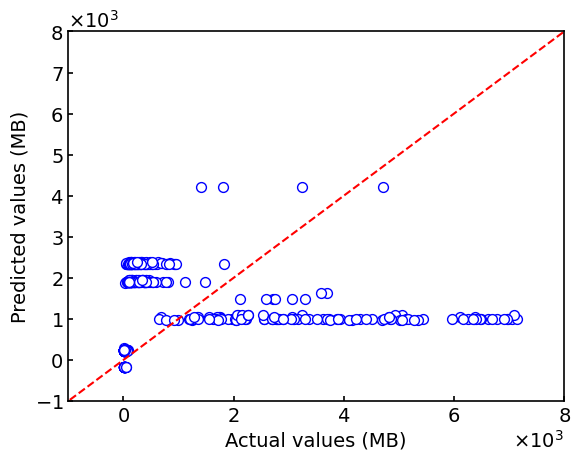

In [14]:
import json
from ml_dcs.internal.graph.graph import GraphUtil
from ml_dcs.domain.ml_simple import MLSimpleTestingResultSet
from ml_dcs.domain.graph import Graph, PredictionAccuracyGraphData

with open(SIMPLE_INPUT_PATH("GBDT"), "r") as f:
    data_dict = json.load(f)
data_model = MLSimpleTestingResultSet(**data_dict)
print(data_model.model_dump_json(indent=2, by_alias=True))
data = PredictionAccuracyGraphData.from_ml_simple_class_div1000(data_model)
graph = Graph(
    data=data,
    x_label=X_LABEL,
    y_label=Y_LABEL,
    x_lim=LIM,
    y_lim=LIM,
    order_of_mag=ORDER_OF_MAG
)
util = GraphUtil(graph)
util.show()

results_mae.append(data_model.result_at_best_accuracy.mae)
results_rmse.append(data_model.result_at_best_accuracy.rmse)

{
  "algorithm": "Decision Tree",
  "results": [
    {
      "algorithm": "Decision Tree",
      "random_state": 42,
      "duration": "PT0.000181S",
      "mae": 1483607.3783783785,
      "mse": 3923469915229.886,
      "rmse": 1980775.0794145928,
      "r_squared": -0.4344752144731068
    }
  ],
  "result_at_best_accuracy": {
    "algorithm": "Decision Tree",
    "random_state": 42,
    "lts_names": [
      "ArtGallery（N, 2 room）_000106",
      "ArtGallery（N, 2 room）_000010",
      "ArtGallery（N, 2 room）_000131",
      "ArtGallery（N, 2 room）_000148",
      "ArtGallery（N, 3 room）_000068",
      "ArtGallery（N, 4 room）_000064",
      "ArtGallery（N, 2 room）_000064",
      "ArtGallery（N, 3 room）_000018",
      "ArtGallery（N, 3 room）_000131",
      "ArtGallery（N, 4 room）_000050",
      "ArtGallery（N, 4 room）_000069",
      "ArtGallery（N, 2 room）_000111",
      "ArtGallery（N, 3 room）_000040",
      "ArtGallery（N, 2 room）_000055",
      "ArtGallery（N, 3 room）_000158",
      "ArtGallery（N, 3 

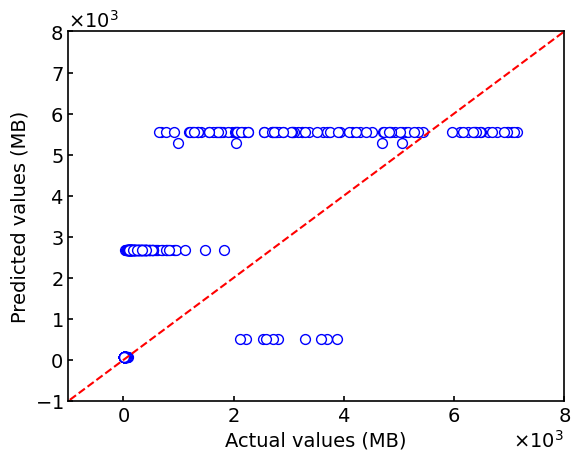

In [15]:
import json
from ml_dcs.internal.graph.graph import GraphUtil
from ml_dcs.domain.ml_simple import MLSimpleTestingResultSet
from ml_dcs.domain.graph import Graph, PredictionAccuracyGraphData

with open(SIMPLE_INPUT_PATH("DT"), "r") as f:
    data_dict = json.load(f)
data_model = MLSimpleTestingResultSet(**data_dict)
print(data_model.model_dump_json(indent=2, by_alias=True))
data = PredictionAccuracyGraphData.from_ml_simple_class_div1000(data_model)
graph = Graph(
    data=data,
    x_label=X_LABEL,
    y_label=Y_LABEL,
    x_lim=LIM,
    y_lim=LIM,
    order_of_mag=ORDER_OF_MAG
)
util = GraphUtil(graph)
util.show()

results_mae.append(data_model.result_at_best_accuracy.mae)
results_rmse.append(data_model.result_at_best_accuracy.rmse)

{
  "algorithm": "Logistic Regression",
  "results": [
    {
      "algorithm": "Logistic Regression",
      "random_state": 42,
      "duration": "PT0.004345S",
      "mae": 798018.8957528957,
      "mse": 2815610967659.888,
      "rmse": 1677978.2381365641,
      "r_squared": -0.02942656219401618
    }
  ],
  "result_at_best_accuracy": {
    "algorithm": "Logistic Regression",
    "random_state": 42,
    "lts_names": [
      "ArtGallery（N, 2 room）_000106",
      "ArtGallery（N, 2 room）_000010",
      "ArtGallery（N, 2 room）_000131",
      "ArtGallery（N, 2 room）_000148",
      "ArtGallery（N, 3 room）_000068",
      "ArtGallery（N, 4 room）_000064",
      "ArtGallery（N, 2 room）_000064",
      "ArtGallery（N, 3 room）_000018",
      "ArtGallery（N, 3 room）_000131",
      "ArtGallery（N, 4 room）_000050",
      "ArtGallery（N, 4 room）_000069",
      "ArtGallery（N, 2 room）_000111",
      "ArtGallery（N, 3 room）_000040",
      "ArtGallery（N, 2 room）_000055",
      "ArtGallery（N, 3 room）_000158",
     

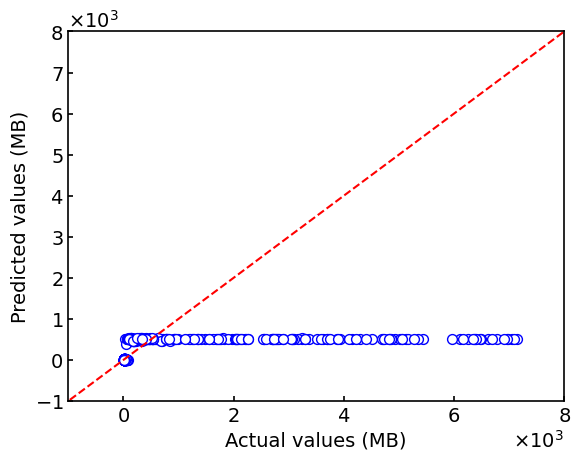

In [16]:
import json
from ml_dcs.internal.graph.graph import GraphUtil
from ml_dcs.domain.ml_simple import MLSimpleTestingResultSet
from ml_dcs.domain.graph import Graph, PredictionAccuracyGraphData

with open(SIMPLE_INPUT_PATH("LR"), "r") as f:
    data_dict = json.load(f)
data_model = MLSimpleTestingResultSet(**data_dict)
print(data_model.model_dump_json(indent=2, by_alias=True))
data = PredictionAccuracyGraphData.from_ml_simple_class_div1000(data_model)
graph = Graph(
    data=data,
    x_label=X_LABEL,
    y_label=Y_LABEL,
    x_lim=LIM,
    y_lim=LIM,
    order_of_mag=ORDER_OF_MAG
)
util = GraphUtil(graph)
util.show()

results_mae.append(data_model.result_at_best_accuracy.mae)
results_rmse.append(data_model.result_at_best_accuracy.rmse)

{
  "task_results": [
    {
      "lts_name": "ArtGallery（N, 2 room）_000106",
      "loss": 72497219239936.0,
      "actual": 17078.0,
      "predicted": 8531608.0,
      "started_at": "2024-12-19T11:23:46.541346",
      "finished_at": "2024-12-19T11:23:46.542740",
      "duration": "PT0.001394S"
    },
    {
      "lts_name": "ArtGallery（N, 2 room）_000010",
      "loss": 74191558672384.0,
      "actual": 17260.0,
      "predicted": 8630712.0,
      "started_at": "2024-12-19T11:23:46.543175",
      "finished_at": "2024-12-19T11:23:46.544446",
      "duration": "PT0.001271S"
    },
    {
      "lts_name": "ArtGallery（N, 2 room）_000131",
      "loss": 123923580583936.0,
      "actual": 40366.0,
      "predicted": 11172463.0,
      "started_at": "2024-12-19T11:23:46.544831",
      "finished_at": "2024-12-19T11:23:46.546120",
      "duration": "PT0.001289S"
    },
    {
      "lts_name": "ArtGallery（N, 2 room）_000148",
      "loss": 40157721919488.0,
      "actual": 25164.0,
      "predict

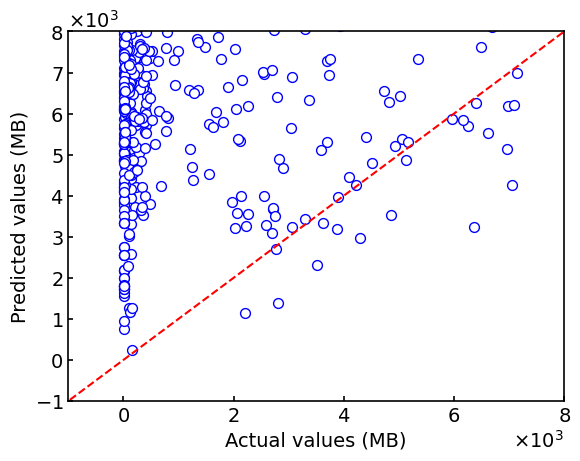

In [17]:
import json
from ml_dcs.internal.graph.graph import GraphUtil
from ml_dcs.domain.ml_gnn import GNNTestingResult
from ml_dcs.domain.graph import Graph, PredictionAccuracyGraphData

with open(GNN_INPUT_PATH_L1, "r") as f:
    data_dict = json.load(f)
data_model = GNNTestingResult(**data_dict)
print(data_model.model_dump_json(indent=2, by_alias=True))
data = PredictionAccuracyGraphData.from_ml_gnn_class_div1000(data_model)
graph = Graph(
    data=data,
    x_label=X_LABEL,
    y_label=Y_LABEL,
    x_lim=LIM,
    y_lim=LIM,
    order_of_mag=ORDER_OF_MAG
)
util = GraphUtil(graph)
util.show()

results_mae.append(data_model.mae)
results_rmse.append(data_model.rmse)

{
  "task_results": [
    {
      "lts_name": "ArtGallery（N, 2 room）_000106",
      "loss": 70403874816.0,
      "actual": 17078.0,
      "predicted": -248259.28125,
      "started_at": "2024-12-19T12:07:40.077249",
      "finished_at": "2024-12-19T12:07:40.079261",
      "duration": "PT0.002012S"
    },
    {
      "lts_name": "ArtGallery（N, 2 room）_000010",
      "loss": 109529718784.0,
      "actual": 17260.0,
      "predicted": -313692.75,
      "started_at": "2024-12-19T12:07:40.079664",
      "finished_at": "2024-12-19T12:07:40.081574",
      "duration": "PT0.00191S"
    },
    {
      "lts_name": "ArtGallery（N, 2 room）_000131",
      "loss": 182507110400.0,
      "actual": 40366.0,
      "predicted": -386842.5,
      "started_at": "2024-12-19T12:07:40.081939",
      "finished_at": "2024-12-19T12:07:40.089104",
      "duration": "PT0.007165S"
    },
    {
      "lts_name": "ArtGallery（N, 2 room）_000148",
      "loss": 114824003584.0,
      "actual": 25164.0,
      "predicted": -3

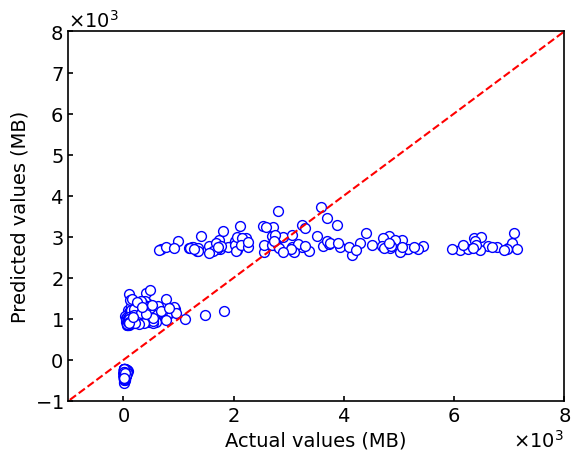

In [18]:
import json
from ml_dcs.internal.graph.graph import GraphUtil
from ml_dcs.domain.ml_gnn import GNNTestingResult
from ml_dcs.domain.graph import Graph, PredictionAccuracyGraphData

with open(GNN_INPUT_PATH_L2, "r") as f:
    data_dict = json.load(f)
data_model = GNNTestingResult(**data_dict)
print(data_model.model_dump_json(indent=2, by_alias=True))
data = PredictionAccuracyGraphData.from_ml_gnn_class_div1000(data_model)
graph = Graph(
    data=data,
    x_label=X_LABEL,
    y_label=Y_LABEL,
    x_lim=LIM,
    y_lim=LIM,
    order_of_mag=ORDER_OF_MAG
)
util = GraphUtil(graph)
util.show()

results_mae.append(data_model.mae)
results_rmse.append(data_model.rmse)

{
  "task_results": [
    {
      "lts_name": "ArtGallery（N, 2 room）_000106",
      "loss": 1921601024.0,
      "actual": 17078.0,
      "predicted": 60914.0703125,
      "started_at": "2024-12-19T12:36:56.853416",
      "finished_at": "2024-12-19T12:36:56.856727",
      "duration": "PT0.003311S"
    },
    {
      "lts_name": "ArtGallery（N, 2 room）_000010",
      "loss": 1905677184.0,
      "actual": 17260.0,
      "predicted": 60914.0625,
      "started_at": "2024-12-19T12:36:56.857219",
      "finished_at": "2024-12-19T12:36:56.868918",
      "duration": "PT0.011699S"
    },
    {
      "lts_name": "ArtGallery（N, 2 room）_000131",
      "loss": 302426240.0,
      "actual": 40366.0,
      "predicted": 57756.40625,
      "started_at": "2024-12-19T12:36:56.877379",
      "finished_at": "2024-12-19T12:36:56.884282",
      "duration": "PT0.006903S"
    },
    {
      "lts_name": "ArtGallery（N, 2 room）_000148",
      "loss": 1278067584.0,
      "actual": 25164.0,
      "predicted": 60914.0

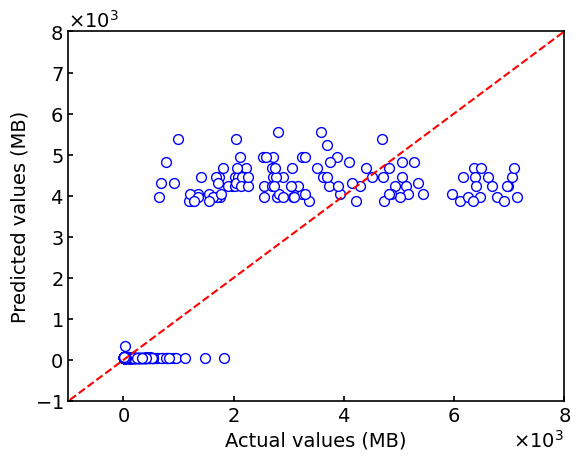

,lts,actual_values,predicted_values
241,"ArtGallery（N, 2 room）_000037",12.384,57.756406
319,"ArtGallery（N, 2 room）_000151",12.448,52.170145
13,"ArtGallery（N, 2 room）_000055",12.655,57.756402
54,"ArtGallery（N, 2 room）_000065",12.839,49.641605
309,"ArtGallery（N, 2 room）_000080",13.689,60.914070
...,...,...,...
236,"ArtGallery（N, 4 room）_000052",6958.988,4237.631000
50,"ArtGallery（N, 4 room）_000156",6975.410,4237.631000
64,"ArtGallery（N, 4 room）_000151",7059.688,4449.071500
120,"ArtGallery（N, 4 room）_000133",7095.450,4682.629000


In [19]:
import json
from ml_dcs.internal.graph.graph import GraphUtil
from ml_dcs.domain.ml_gnn import GNNTestingResult
from ml_dcs.domain.graph import Graph, PredictionAccuracyGraphData

with open(GNN_INPUT_PATH_L3, "r") as f:
    data_dict = json.load(f)
data_model = GNNTestingResult(**data_dict)
print(data_model.model_dump_json(indent=2, by_alias=True))
data = PredictionAccuracyGraphData.from_ml_gnn_class_div1000(data_model)
graph = Graph(
    data=data,
    x_label=X_LABEL,
    y_label=Y_LABEL,
    x_lim=LIM,
    y_lim=LIM,
    order_of_mag=ORDER_OF_MAG
)
util = GraphUtil(graph)
util.show()

results_mae.append(data_model.mae)
results_rmse.append(data_model.rmse)

EvaluationResult.from_gnn_class(data_model).dataframe_div1000

In [20]:
# FOR TABLE
import pandas as pd

pd.DataFrame({
    "MAE": [v / 1000 for v in results_mae],
    "RMSE": [v / 1000 for v in results_rmse]
})

,MAE,RMSE
0,1156.777871,1501.456148
1,1359.161854,1868.533466
2,1483.607378,1980.775079
3,798.018896,1677.978238
4,5870.022188,6528.015531
5,795.175171,1080.829108
6,519.188767,998.137588
